In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from lab_helper import plot_boundaries, plot_boundaries_keras
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from PlotCallback import PlotCallback
from multiclass_helper import draw_neural_net
from keras import backend as K

Using TensorFlow backend.


In [3]:
def generate_gaussians_distributions(sep=1, N=500, random_state=42, normalize=True):
    np.random.seed(random_state)
    # Zeros
    X1 = np.random.multivariate_normal(sep*np.array([0.5, 0.5]), [[0.1,-0.085],[-0.085,0.1]], N//2)
    # Ones
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    indexes = np.arange(len(y))
    np.random.shuffle(indexes)
    if normalize:
        X = (X - X.mean(axis=0))/X.std(axis=0)
    else:
        X[:, 0] = X[:, 0]
        X[:, 1] = X[:, 1]
    return X[indexes], y[indexes]

In [4]:
# Primero probar con N = 3000 para ver bien las distribuciones
X, y = generate_gaussians_distributions(sep=2, N = 500, normalize=False, random_state=41)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

# Armar modelos cambiando loss y función de activación
- linear, sigmoid
- mse, binary_crossentropy

In [29]:
model = Sequential()
# Que pasa si no pongo la función de activación??!
model.add(Dense(1, input_shape=(2,), kernel_regularizer=l2() ,activation='linear'))
model.compile(Adam(lr=0.1), loss='mse', metrics=['accuracy'])

In [30]:
model.fit(X, y, epochs=10, verbose=1, batch_size=100)

Epoch 1/10
500/500 [==============================] - 0s 259us/step - loss: 0.7785 - acc: 0.3400
Epoch 2/10
500/500 [==============================] - 0s 10us/step - loss: 0.2476 - acc: 0.6720
Epoch 3/10
500/500 [==============================] - 0s 11us/step - loss: 0.1863 - acc: 0.7840
Epoch 4/10
500/500 [==============================] - 0s 10us/step - loss: 0.1293 - acc: 0.8600
Epoch 5/10
500/500 [==============================] - 0s 10us/step - loss: 0.0463 - acc: 0.9760
Epoch 6/10
500/500 [==============================] - 0s 9us/step - loss: 0.0237 - acc: 0.9960
Epoch 7/10
500/500 [==============================] - 0s 9us/step - loss: 0.0331 - acc: 0.9940
Epoch 8/10
500/500 [==============================] - 0s 11us/step - loss: 0.0284 - acc: 0.9940
Epoch 9/10
500/500 [==============================] - 0s 9us/step - loss: 0.0247 - acc: 0.9960
Epoch 10/10
500/500 [==============================] - 0s 9us/step - loss: 0.0254 - acc: 0.9960


500/500 [==============================] - 0s 95us/step
(41820, 1)


/home/usuario/anaconda3/envs/gpu/lib/python3.6/site-packages/keras/engine/sequential.py:247: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


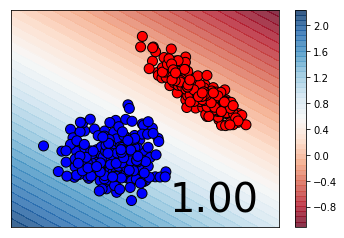

In [31]:
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba)

In [28]:
model.predict_proba(X)[:10]

/home/usuario/anaconda3/envs/gpu/lib/python3.6/site-packages/keras/engine/sequential.py:247: UserWarning: Network returning invalid probability values. The last layer might not normalize predictions into probabilities (like softmax or sigmoid would).
  warnings.warn('Network returning invalid probability values. '


array([[ 0.95511425],
       [ 0.15673488],
       [-0.02036828],
       [ 0.15967429],
       [ 0.04999393],
       [ 0.5333068 ],
       [ 0.14912546],
       [ 0.07754105],
       [ 0.90243715],
       [ 0.20617676]], dtype=float32)

# Regresión lineal

In [70]:
X = np.random.normal(0, 1, 100)
A = 2
B = 1
y = A*X + B +  np.random.normal(0, 1, len(X))

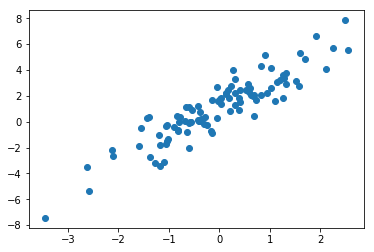

In [72]:
plt.scatter(X, y)
plt.show()

In [159]:
model = Sequential()
# Que pasa si no pongo la función de activación??!
model.add(Dense(1, input_shape=(1,), kernel_regularizer=l2() ,activation='linear'))

In [176]:
model.compile(Adam(lr=0.001), loss='mse', metrics=['mse'])

In [177]:
model.fit(X, y, epochs=10)

Epoch 1/10
100/100 [==============================] - 0s 3ms/step - loss: 1.0972 - mean_squared_error: 1.0587
Epoch 2/10
100/100 [==============================] - 0s 40us/step - loss: 1.0967 - mean_squared_error: 1.0583
Epoch 3/10
100/100 [==============================] - 0s 40us/step - loss: 1.0966 - mean_squared_error: 1.0582
Epoch 4/10
100/100 [==============================] - 0s 45us/step - loss: 1.0960 - mean_squared_error: 1.0576
Epoch 5/10
100/100 [==============================] - 0s 40us/step - loss: 1.0956 - mean_squared_error: 1.0572
Epoch 6/10
100/100 [==============================] - 0s 38us/step - loss: 1.0953 - mean_squared_error: 1.0569
Epoch 7/10
100/100 [==============================] - 0s 39us/step - loss: 1.0950 - mean_squared_error: 1.0565
Epoch 8/10
100/100 [==============================] - 0s 39us/step - loss: 1.0947 - mean_squared_error: 1.0562
Epoch 9/10
100/100 [==============================] - 0s 39us/step - loss: 1.0947 - mean_squared_error: 1.0562
Ep

In [180]:
A_pred, B_pred = model.get_weights()
print(A_pred, B_pred)

[[1.964852]] [1.0495688]


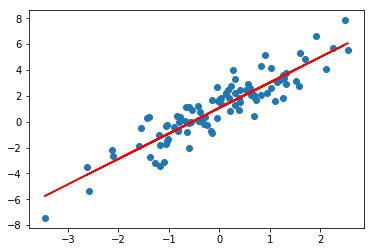

In [181]:
y_pred = A_pred[0][0]*X + B_pred[0] 
plt.scatter(X, y)
plt.plot(X, y_pred, color='r')
plt.show()

# MLP

In [248]:
X, y = generate_gaussians_distributions(sep=1, N = 50, normalize=False, random_state=41)

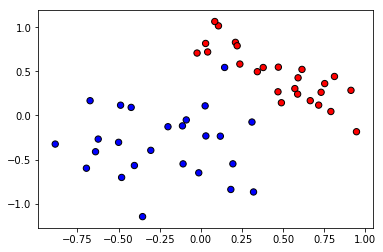

In [249]:
plot_boundaries(X,y)

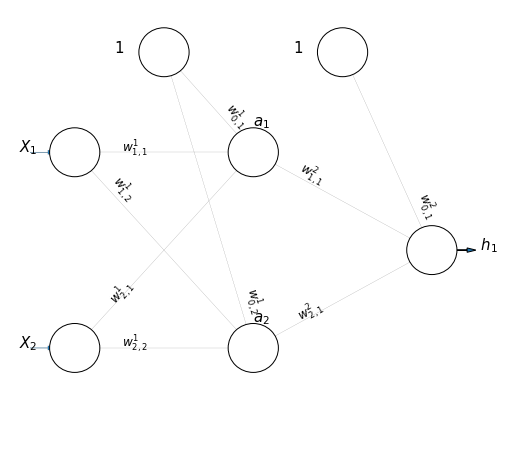

In [332]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
biases = [['$w_{0,1}^1$',  '$w_{0,2}^1$'], 
          ['$w_{0,1}^2$']]
capa_1 = [[ '$w_{1,1}^1$', '$w_{1,2}^1$'],
          [ '$w_{2,1}^1$', '$w_{2,2}^1$']]
capa_2 = [['$w_{1,1}^2$'],
          ['$w_{2,1}^2$'], 
          ['$w_{3,1}^2$']]
weights = [np.array(capa_1),np.array(capa_2)]
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, [2,2,1], weights, biases)
plt.show()

In [333]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [334]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [335]:
model.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [336]:
# Arrancar con lr = 0.01, bs=128
K.set_value(model.optimizer.lr, 0.1)
model.fit(X, y, epochs=1000, verbose=0, batch_size=128)

50/50 [==============================] - 0s 6ms/step
(22862, 1)


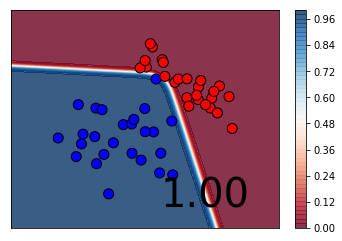

In [337]:
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba)